<img width="400" src="https://nomeroff.net.ua/images/logo/nomeroff_net.svg" alt="Nomeroff Net. Automatic numberplate recognition system" align="left"/>

## The example demonstrates license plate number detection.

In [1]:
import os
import sys
import matplotlib.pyplot as plt

current_dir = os.path.dirname("./")
nomeroff_net_dir = os.path.join(current_dir, "../../../")
sys.path.append(nomeroff_net_dir)

from nomeroff_net import pipeline
from nomeroff_net.tools import unzip
from nomeroff_net.pipes.number_plate_classificators.options_detector import CLASS_REGION_ALL

2024-12-03 09:01:52.983673: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-03 09:01:53.022958: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-03 09:01:53.022993: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-03 09:01:53.023055: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-03 09:01:53.030914: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: A

In [2]:
number_plate_detection_and_reading = pipeline("number_plate_detection_and_reading", 
                                              # setup ocrs (presets key is detector file name in dir ./nomeroff_net/text_detectors/ )
                                              presets={
                                                "ru": {
                                                    "for_regions": CLASS_REGION_ALL,
                                                    "model_path": "latest"
                                                },
                                              },
                                              default_label="ru",
                                              default_lines_count=1,
                                              # if you not need detect region or count lines
                                              off_number_plate_classification=True,
                                              image_loader="opencv")

WARNING ⚠️ Python>=3.10 is required, but Python==3.9.18 is currently installed 


/home/dmitro/.local/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/dmitro/.local/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
result = number_plate_detection_and_reading([
    os.path.join(nomeroff_net_dir, './data/examples/oneline_images/20190525.jpg'),
])

/mnt/var/www/projects_computer_vision/nomeroff-net/tutorials/ju/inference/./../../../nomeroff_net/pipes/number_plate_text_readers/base/ocr.py:261: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  pred_texts = decode_batch(torch.Tensor(net_out_value), self.label_converter)


In [4]:
(images, images_bboxs, 
 images_points, images_zones, region_ids, 
 region_names, count_lines, 
 confidences, texts) = unzip(result)

['M556BX159']


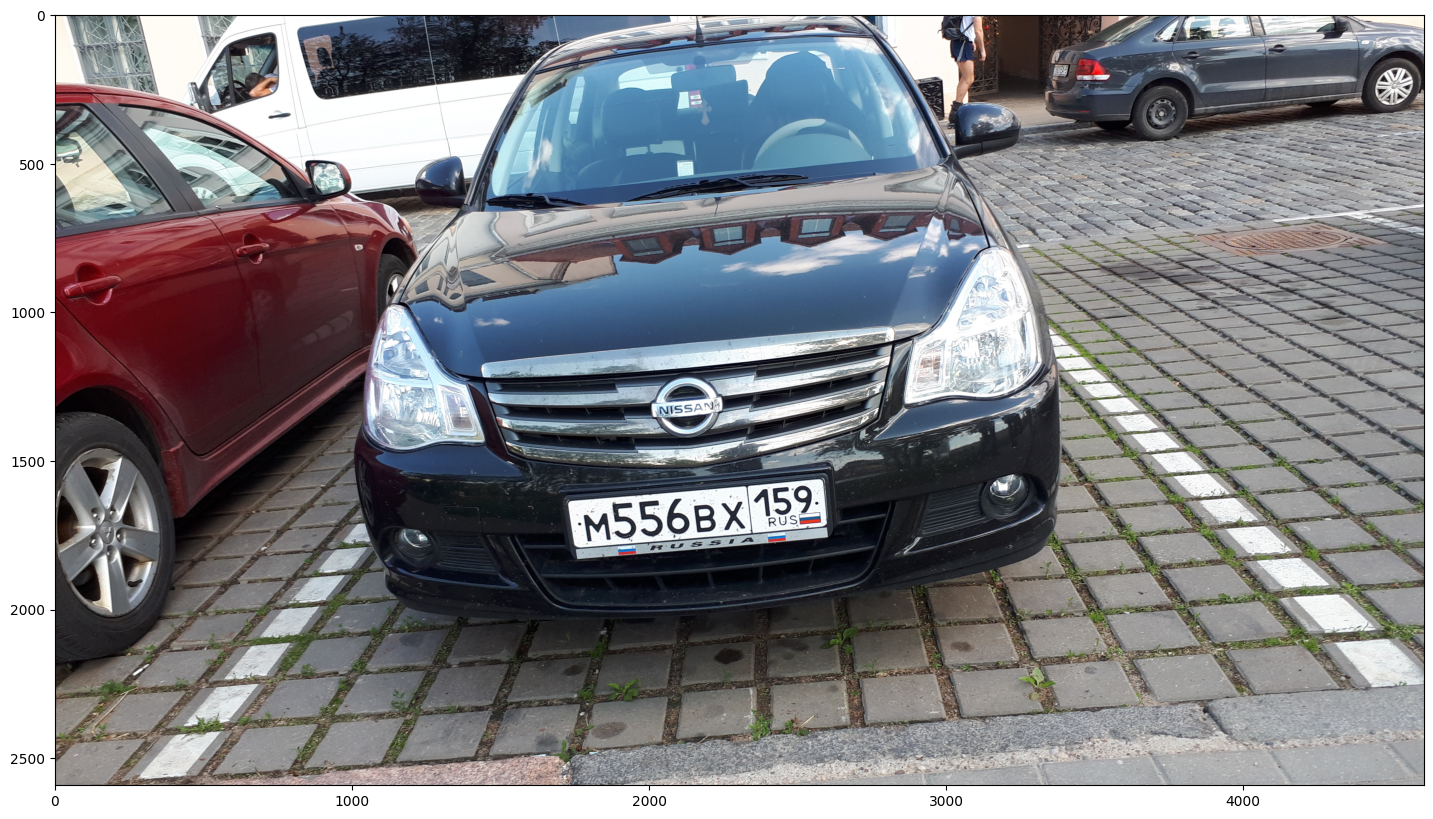

In [5]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

for img, np in zip(images, texts):
    print(np)
    plt.imshow(img)
    plt.show()